In [3]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import math
import sys
sys.path.insert(0, './code')
from CastCol import cast_columns

gzip = True
if gzip:
    import gzip
    open = gzip.open

In [4]:
def ip_to_user(ip, group_size=5, starting=5):
    isp = int(int(ip.split(".")[-2]))
    node_number = int(ip.split(".")[-1]) - starting - isp
    user = node_number % group_size
    group = math.floor(node_number / group_size)
    return '/tordata/config/group_' + str(group) + "_user_" + str(user)

In [5]:
def limit_range(ts1, ts2):
    range = min(ts2.index.values), max(ts2.index.values)
    ts1 = ts1.loc[(ts1.index >= range[0]) & (ts1.index <= range[1])]
    return ts1

In [6]:
def load(data_file):
    with open(data_file, 'rb') as file:
        traffic = pickle.load(file)
        msgs = pickle.load(file)
    return traffic, msgs

def select(data, ip, feature, limit=False):
    traffic = data[0][ip][feature]
    msgs = data[1][ip_to_user(ip)]["count"]
    if limit:
        traffic = limit_range(traffic, msgs)
    return traffic, msgs

def plot(ts,):
    fig, ax = plt.subplots(figsize=(8, 6))
    for t in ts:
        ax.plot(t[0], label=t[1])
    plt.legend()

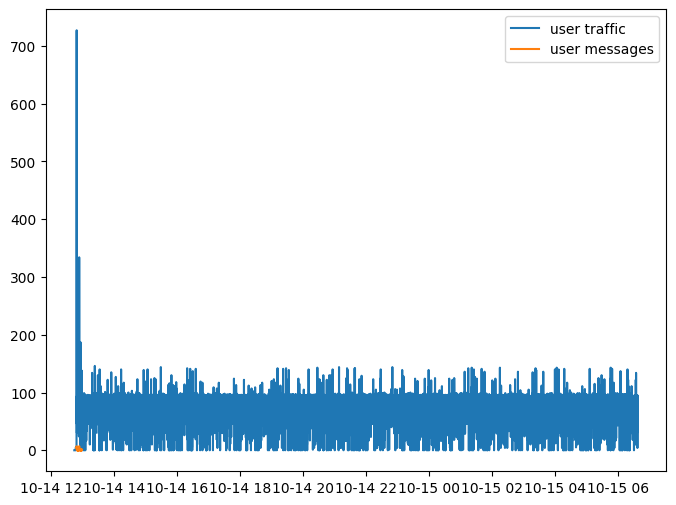

In [36]:
data_file = "code/pkl/doh_new_scale1000__ts.pkl.gz"
ip = "102.0.0.15"
feature = "count_ISPAll"

dot = load(data_file)
dot_traffic, dot_user = select(dot, ip, feature, limit=False)
plot([(dot_traffic, "user traffic"), (dot_user, "user messages")])